In [0]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0.5, 1.0, 'Count of images for each digit (0 - 9)')

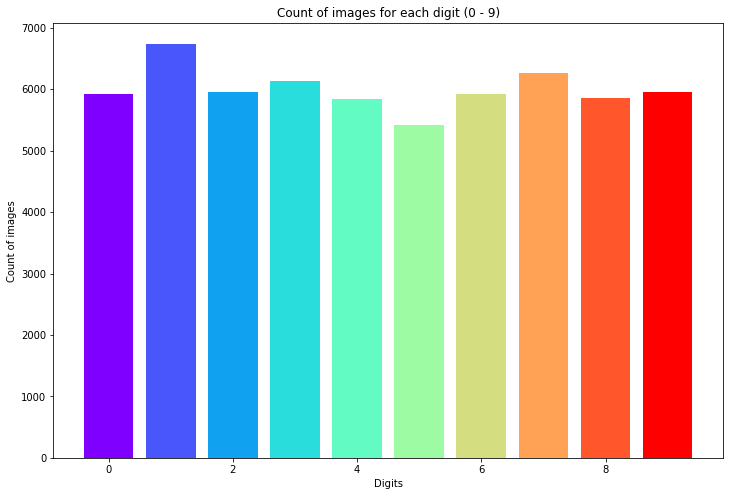

In [52]:
from matplotlib.cm import rainbow
import matplotlib.pyplot as plt
%matplotlib inline

label=[0]*10

for i in range(len(y_train)) :
  label[y_train[i]] = label[y_train[i]] + 1
print(label)
plt.figure(figsize = (12,8))
colors = rainbow(np.linspace(0, 1, len(label)))
plt.bar([0,1,2,3,4,5,6,7,8,9], label, color = colors)
plt.xlabel('Digits')
plt.ylabel('Count of images')
plt.title('Count of images for each digit (0 - 9)')

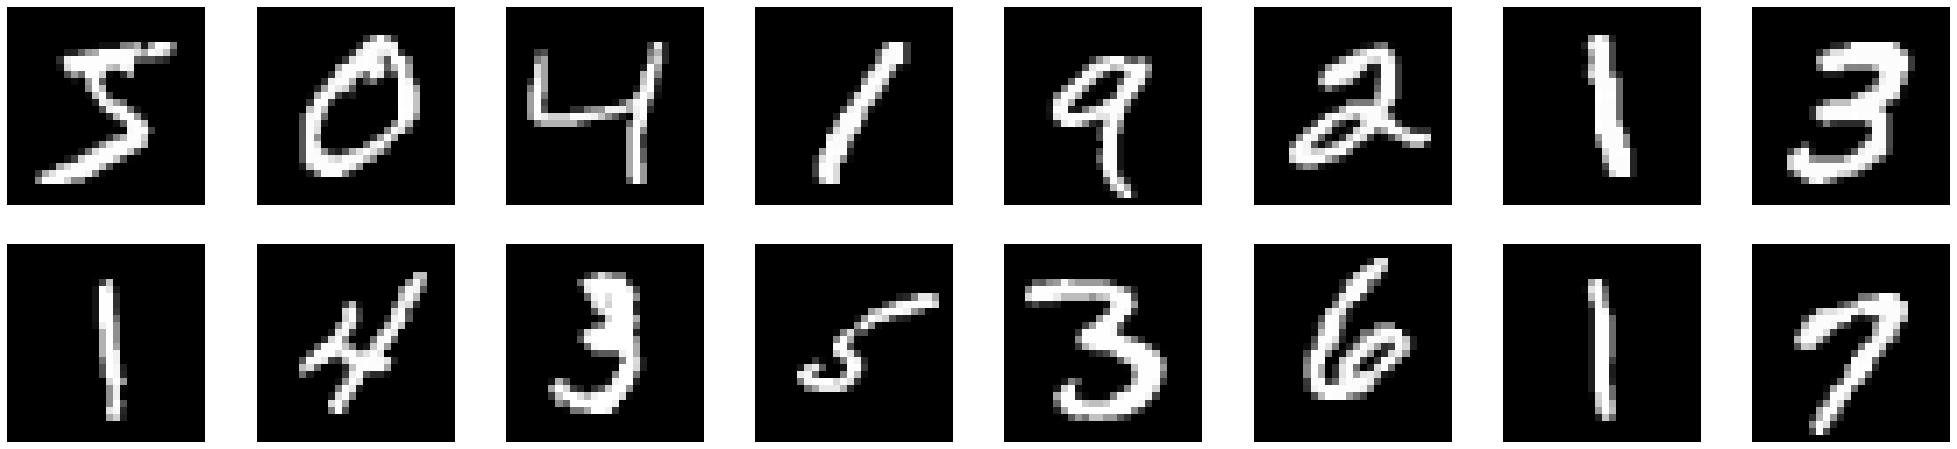

In [53]:
plt.figure(figsize = (35, 8))
for i in range(16):
    index = np.random.randint(len(x_train))
    image_matrix = x_train[i].reshape(28, 28)
    plt.subplot(2, 8, i+1)
    plt.axis('off')
    plt.imshow(image_matrix, cmap=plt.cm.gray)

In [0]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)

In [0]:
# making Image clear by putting all values > 0 as 1
for image in range(len(x_train)):
    for row in range(28):
        for col in range(28):
            if x_train[image][row][col] != 0:
                x_train[image][row][col] = 1

In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128 ,activation='relu'),     
  tf.keras.layers.Dense(128 ,activation='relu'),  
  tf.keras.layers.Dense(10 , activation = 'sigmoid')                   
])

In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10 ,callbacks =[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2625 - accuracy: 0.9193
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1203 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9717
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0703 - accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9862
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9887
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0296 - accuracy: 0.9903
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.026

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  100480    
_________________________________________________________________
dense_4 (Dense)              multiple                  16512     
_________________________________________________________________
dense_5 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


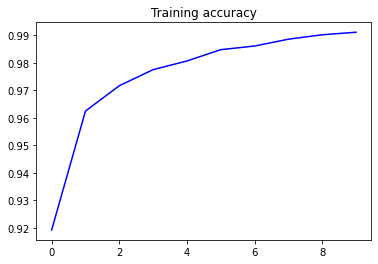

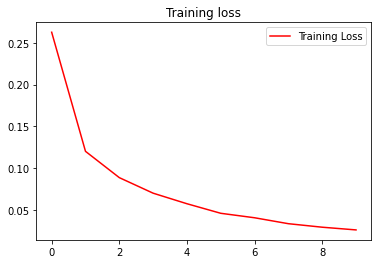

In [60]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
for image in range(len(x_test)):
  for row in range(28):
        for col in range(28):
          if x_test[image][row][col] != 0:
              x_test[image][row][col] = 1


In [0]:
pred = model.predict(x_test)
ans = []
for p in pred :
  ans.append(np.argmax(p))

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy Score : " + str(accuracy_score(y_test,ans))) 
confusion_matrix(y_test, ans)

Accuracy Score : 0.9727


array([[ 971,    0,    0,    2,    2,    1,    2,    1,    0,    1],
       [   1, 1124,    2,    1,    0,    0,    3,    0,    4,    0],
       [   7,    2, 1004,    8,    1,    1,    1,    5,    3,    0],
       [   0,    0,    5,  961,    0,   24,    0,    6,    9,    5],
       [   2,    3,    3,    0,  956,    1,    3,    1,    4,    9],
       [   2,    0,    0,    6,    1,  868,    3,    0,    8,    4],
       [   9,    3,    0,    1,    3,    4,  935,    0,    3,    0],
       [   1,    0,    8,    5,    1,    0,    0, 1003,    4,    6],
       [  11,    1,    2,    8,    2,    2,    1,    5,  937,    5],
       [   3,    6,    0,    3,   16,    8,    0,    2,    3,  968]])

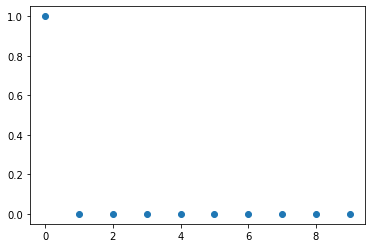

In [65]:
import matplotlib.pyplot as plt
plt.plot(pred[25] , 'o')
plt.show()

In [0]:
model.save('model.h5')